In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Load and prepare the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten the 28x28 images into 1D vectors of size 784
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 2. Define the MLP model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', kernel_initializer='he_normal', input_shape=(28 * 28,)))
model.add(layers.BatchNormalization())  # Batch Normalization
model.add(layers.Dropout(0.2))  # Regularization to prevent overfitting
model.add(layers.Dense(512, kernel_initializer='he_normal',activation='relu'))
model.add(layers.BatchNormalization())  # Batch Normalization
model.add(layers.LeakyReLU(alpha=0.2))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10,activation='softmax'))  # Output layer for 10 classes

# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# 5. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8664 - loss: 0.4220 - val_accuracy: 0.9672 - val_loss: 0.1156
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9689 - loss: 0.1013 - val_accuracy: 0.9708 - val_loss: 0.0953
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9769 - loss: 0.0720 - val_accuracy: 0.9703 - val_loss: 0.1041
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9815 - loss: 0.0548 - val_accuracy: 0.9760 - val_loss: 0.0790
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9877 - loss: 0.0398 - val_accuracy: 0.9763 - val_loss: 0.0816
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9886 - loss: 0.0343 - val_accuracy: 0.9775 - val_loss: 0.0759
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9902 - loss: 0.0309 - val_accuracy: 0.9778 - val_loss: 0.0793
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9904 - loss: 0.0297 - v

In [ ]:
model.save('my_first_model.h5')
import tensorflow as tf
from tensorflow.keras.models import clone_model, load_model
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

# Load the original model
original_model = load_model('my_first_model.h5')

# Clone the model
cloned_model = clone_model(original_model)
cloned_model.set_weights(original_model.get_weights())

# Remove the last layer (output layer) from the cloned model
cloned_model.layers.pop()

# Rebuild the model by adding a Flatten layer and a new output layer
new_model = models.Sequential()

# Add a Flatten layer to convert the 28x28 images into 1D vectors of size 784
new_model.add(layers.Flatten(input_shape=(28, 28)))

# Add the rest of the layers from the cloned model
for layer in cloned_model.layers:
    new_model.add(layer)

# Optionally, freeze the layers
for layer in new_model.layers:
    layer.trainable = True  # You can make the layers trainable if needed

# Add a new output layer for Fashion MNIST (10 classes)
new_model.add(layers.Dense(10, activation='softmax'))

# Compile the new model
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Load the Fashion MNIST dataset
(train2, label_train2), (test2, label_test2) = fashion_mnist.load_data()

# Normalize the data
train2 = train2.astype('float32') / 255.0
test2 = test2.astype('float32') / 255.0

# Train the new model on Fashion MNIST (optional)
new_model.fit(train2, label_train2, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model on the Fashion MNIST test set
test_loss, test_acc = new_model.evaluate(test2, label_test2)
print(f'Fashion MNIST Test accuracy: {test_acc}')

# Example of making predictions on the Fashion MNIST test set
predictions = new_model.predict(test2)

# Output the predicted class for the first image in test2
import numpy as np
predicted_class = np.argmax(predictions[0])
print(f'Predicted class for the first Fashion MNIST test2 image: {predicted_class}')


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.4138 - loss: 1.9432 - val_accuracy: 0.6014 - val_loss: 1.5649
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5941 - loss: 1.4912 - val_accuracy: 0.5932 - val_loss: 1.2999
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.6126 - loss: 1.2290 - val_accuracy: 0.6141 - val_loss: 1.1101
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6174 - loss: 1.0696 - val_accuracy: 0.6141 - val_loss: 1.0145
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.6236 - loss: 0.9624 - val_accuracy: 0.6368 - val_loss: 0.9340
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6489 - loss: 0.8926 - val_accuracy: 0.6514 - val_loss: 0.8674
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6636 - loss: 0.8402 - val_accuracy: 0.7309 - val_loss: 0.8031
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.7239 - loss: 0.7797 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Model prediction: 7


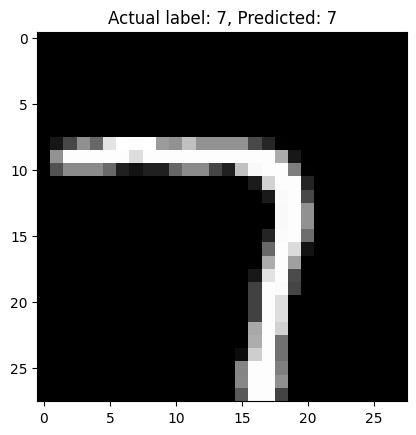

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Select a random test sample
random_index = np.random.randint(0, x_test.shape[0])  # Randomly select an index from the test set
random_test_image = x_test[random_index].reshape(1, 28 * 28)  # Reshape it to match the input shape of the model

# 2. Get the model's prediction
predicted_probabilities = model.predict(random_test_image)

# 3. Convert the prediction to the class label (digit)
predicted_digit = np.argmax(predicted_probabilities)  # Get the class with the highest probability

# 4. Output the prediction
print(f"Model prediction: {predicted_digit}")

# 5. Plot the image for visual confirmation
plt.imshow(x_test[random_index].reshape(28, 28), cmap='gray')
plt.title(f'Actual label: {np.argmax(y_test[random_index])}, Predicted: {predicted_digit}')
plt.show()
